In [4]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch
import pandas as pd

# Loading in Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ViTForImageClassification.from_pretrained( "imjeffhi/pokemon_classifier").to(device)
feature_extractor = ViTFeatureExtractor.from_pretrained('imjeffhi/pokemon_classifier')

# Caling the model on a test image
img = Image.open(r'C:/Users/Owner/OneDrive - 계명대학교/DC/2024/2024_개인/-/test/포켓몬_객체_탐지/images.jpeg')
extracted = feature_extractor(images=img, return_tensors='pt').to(device)
predicted_id = model(**extracted).logits.argmax(-1).item()
predicted_pokemon = model.config.id2label[predicted_id]

In [5]:
predicted_pokemon 

'Conkeldurr'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:/Users/Owner/OneDrive - 계명대학교/DC/2024/2024_개인/-/Pokemon.csv')

In [4]:
def show_rows_by_value(df, column, value):
    result = df[df[column] == value]
    return result

In [5]:
value_to_find = predicted_pokemon
column_to_search = 'Name'

# 결과 출력
result = show_rows_by_value(df, column_to_search, value_to_find)

In [6]:
result

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False


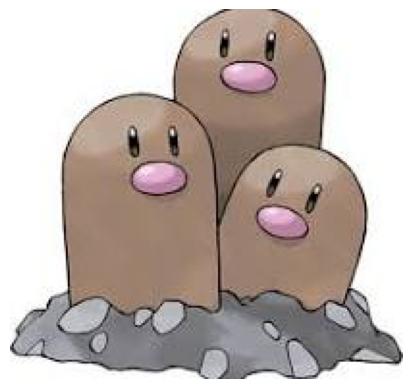

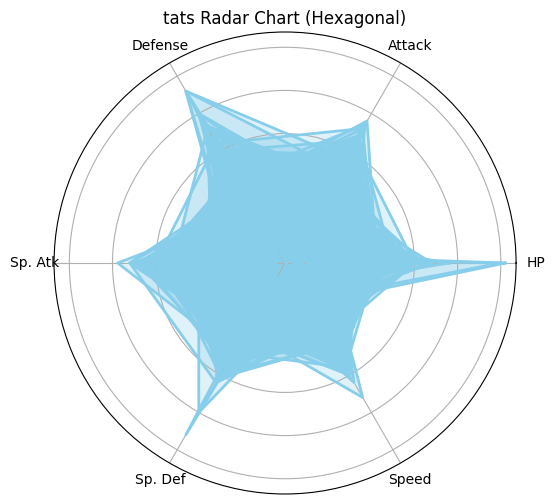

In [7]:
# 레이더 차트
# stats 값을 리스트로 가져오기

# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

values = [df[stat] for stat in stats]
values += values[:1]  # 레이더 차트를 닫기 위해 첫 번째 값을 다시 추가

# 각 항목의 각도를 계산
angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
angles += angles[:1]  # 레이더 차트를 닫기 위해 첫 번째 각도를 다시 추가

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.25)
ax.plot(angles, values, color='skyblue', linewidth=2)

# 각 항목의 레이블 설정
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats)

plt.title('tats Radar Chart (Hexagonal)')
plt.show()